In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
df.columns

Index(['team', 'wins', 'losses', 'goals', 'total_yel_card', 'total_red_card',
       'total_scoring_att', 'ontarget_scoring_att', 'hit_woodwork',
       'att_hd_goal', 'att_pen_goal', 'att_freekick_goal', 'att_ibox_goal',
       'att_obox_goal', 'goal_fastbreak', 'total_offside', 'clean_sheet',
       'goals_conceded', 'saves', 'outfielder_block', 'interception',
       'total_tackle', 'last_man_tackle', 'total_clearance', 'head_clearance',
       'own_goals', 'penalty_conceded', 'pen_goals_conceded', 'total_pass',
       'total_through_ball', 'total_long_balls', 'backward_pass',
       'total_cross', 'corner_taken', 'touches', 'big_chance_missed',
       'clearance_off_line', 'dispossessed', 'penalty_save',
       'total_high_claim', 'punches', 'season'],
      dtype='object')

In [3]:
url ='https://raw.githubusercontent.com/NhAtNgUy/mini-presentation/main/stats.csv'
df=pd.read_csv(url)
df.head(10)

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007
5,Bolton Wanderers,16.0,14.0,47.0,84.0,4.0,404.0,120.0,7.0,10.0,...,942.0,217.0,18932.0,NaN,6.0,NaN,2.0,44.0,21.0,2006-2007
6,Reading,16.0,15.0,52.0,38.0,3.0,419.0,132.0,8.0,15.0,...,1067.0,280.0,18017.0,NaN,2.0,NaN,0.0,63.0,21.0,2006-2007
7,Blackburn Rovers,15.0,16.0,52.0,77.0,6.0,478.0,155.0,5.0,12.0,...,911.0,205.0,20812.0,NaN,8.0,NaN,5.0,56.0,25.0,2006-2007
8,Everton,15.0,10.0,52.0,65.0,2.0,465.0,153.0,9.0,9.0,...,867.0,208.0,19250.0,NaN,2.0,NaN,1.0,83.0,15.0,2006-2007
9,Portsmouth,14.0,12.0,45.0,48.0,1.0,525.0,186.0,9.0,13.0,...,783.0,247.0,19377.0,NaN,4.0,NaN,2.0,79.0,30.0,2006-2007


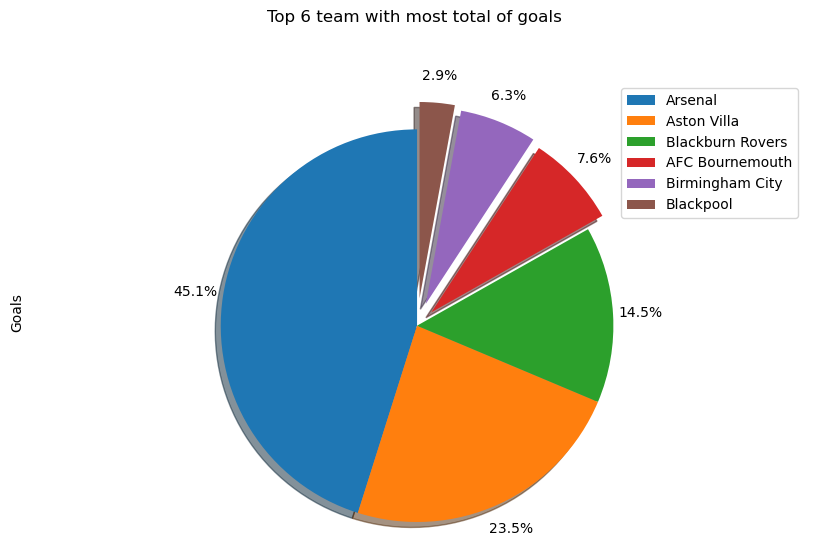

In [16]:
#pie chart 
explode_list =[0,0,0,0.1,0.12,0.14] 
df1=df[['team','goals']].groupby(['team']).sum().head(6).reset_index().sort_values(['goals'],ascending=False)
df1['goals'].plot(kind='pie',figsize=(10,6),autopct='%1.1f%%',startangle=90,labels=None,shadow=True,pctdistance=1.14,explode=explode_list)
plt.ylabel('Goals')
plt.title('Top 6 team with most total of goals ',y=1.11)
plt.axis('equal')
plt.legend(labels=df1['team'],loc='upper right')
plt.show()

[Text(0.5, 0, 'Losses'),
 Text(0, 0.5, 'Total red card'),
 Text(0.5, 1.0, 'The relationship between the total of red cards and the total of losses')]

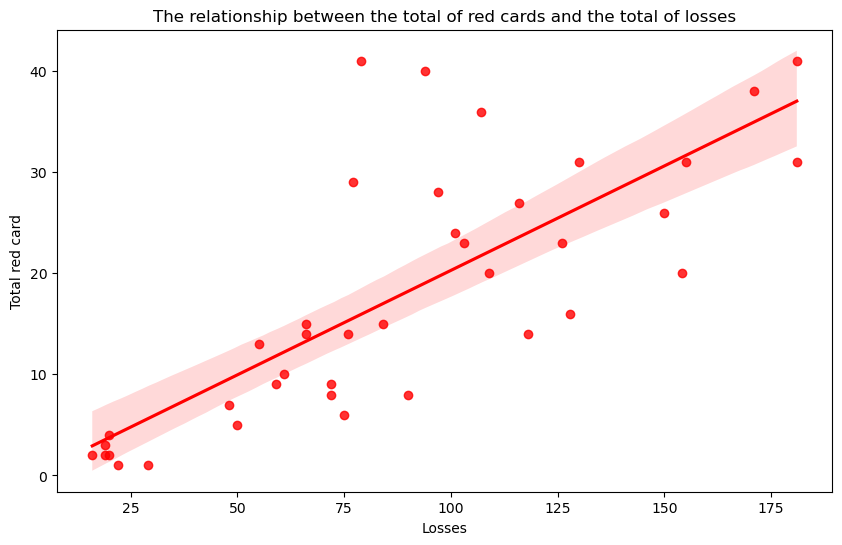

In [5]:
#scatter plot 
import seaborn as sns 
df2 = df[['team','losses','total_red_card']].groupby('team').sum()
plt.figure(figsize=(10,6))
ax=sns.regplot(x='losses',y='total_red_card',data=df2,color='r',marker='o') 
ax.set(xlabel='Losses',ylabel='Total red card',title="The relationship between the total of red cards and the total of losses")

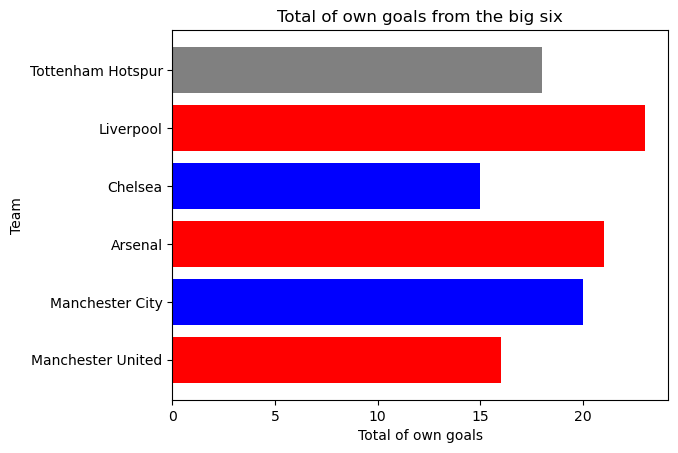

In [6]:
df3=df[['team','own_goals']].groupby('team').sum()
df3=df3.loc[['Manchester United','Manchester City','Arsenal','Chelsea','Liverpool','Tottenham Hotspur'],:].reset_index()
c=['red','blue','red','blue','red','gray']
plt.barh(df3['team'],df3['own_goals'],color=c)
plt.xlabel('Total of own goals') 
plt.ylabel('Team')
plt.title('Total of own goals from the big six')
plt.show()

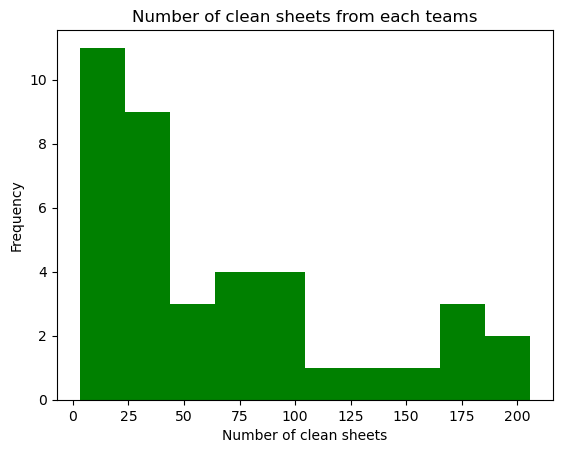

In [5]:
red_cards=df["clean_sheet"].groupby(df['team']).sum()
plt.hist(red_cards,color="green",bins=10)
plt.title("Number of clean sheets from each teams")
plt.xlabel("Number of clean sheets")
plt.ylabel("Frequency")
plt.show()